In [11]:
import pandas as pd

# Função de preprocessamento
def preprocess_data(file_path, output_path):
    # Carregar o arquivo CSV
    df = pd.read_csv(file_path)

    # Normalizar os nomes das colunas
    df.columns = [
        col.strip()
        .replace(" ", "_")
        .replace("?", "")
        .replace(".", "")
        .replace("/", "")
        .replace(",", "")
        .replace("[", "")
        .replace("]", "")
        for col in df.columns
    ]

    # Remover espaços extras nos valores de texto
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

    # Tratar valores ausentes (remover ou preencher)
    df = df.fillna("Não informado")

    # Conversões específicas para análise
    if 'Qual_é_a_sua_idade' in df.columns:
        # Criar faixas etárias padronizadas
        df['Faixa_Etária'] = df['Qual_é_a_sua_idade'].replace({
            'Menos de 18 anos': 'Menor de 18',
            '18 a 28 anos': '18-28',
            '29 a 39 anos': '29-39',
            '40 a 50 anos': '40-50',
            '51 a 61 anos': '51-61',
            'Mais de 61 anos': '61+',
        })

    # Garantir consistência em colunas categóricas (exemplo: gênero)
    if 'Qual_é_o_seu_sexo' in df.columns:
        df['Qual_é_o_seu_sexo'] = df['Qual_é_o_seu_sexo'].replace({
            'Masculino.': 'Masculino',
            'Feminino.': 'Feminino',
        })

    # Salvar o arquivo preprocessado
    df.to_csv(output_path, index=False)
    return df

# Caminhos de entrada e saída
input_file = 'museu.csv'  # Substitua pelo caminho correto do arquivo de entrada
output_file = 'museu_cleaned.csv'  # Nome do arquivo preprocessado

# Executar o preprocessamento
cleaned_data = preprocess_data(input_file, output_file)

# Exibir informações do DataFrame limpo
print("Arquivo preprocessado salvo em:", output_file)
print("Primeiras linhas do DataFrame preprocessado:")
print(cleaned_data.head())


Arquivo preprocessado salvo em: museu_cleaned.csv
Primeiras linhas do DataFrame preprocessado:
           Carimbo_de_datahora Qual_é_o_seu_sexo Qual_é_a_sua_idade  \
0  2024/11/14 4:48:09 PM GMT-3          Feminino      51 a 61 anos.   
1  2024/11/14 5:04:24 PM GMT-3          Feminino      40 a 50 anos.   
2  2024/11/14 5:12:53 PM GMT-3         Masculino      51 a 61 anos.   
3  2024/11/14 5:14:50 PM GMT-3          Feminino      29 a 39 anos.   
4  2024/11/14 5:15:15 PM GMT-3         Masculino      40 a 50 anos.   

  Qual_a_sua_corraça  \
0            Branco.   
1             Pardo.   
2            Branco.   
3            Branco.   
4             Pardo.   

  Qual_é_sua_renda_familiar_mensal_A_renda_familiar_é_a_soma_de_todos_os_ganhos_financeiros_dos_membros_de_uma_família_que_moram_no_mesmo_endereço  \
0                               Acima de R$ 5.648,00                                                                                                 
1                               A

C:\Users\guihe\AppData\Local\Temp\ipykernel_17560\1846323327.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


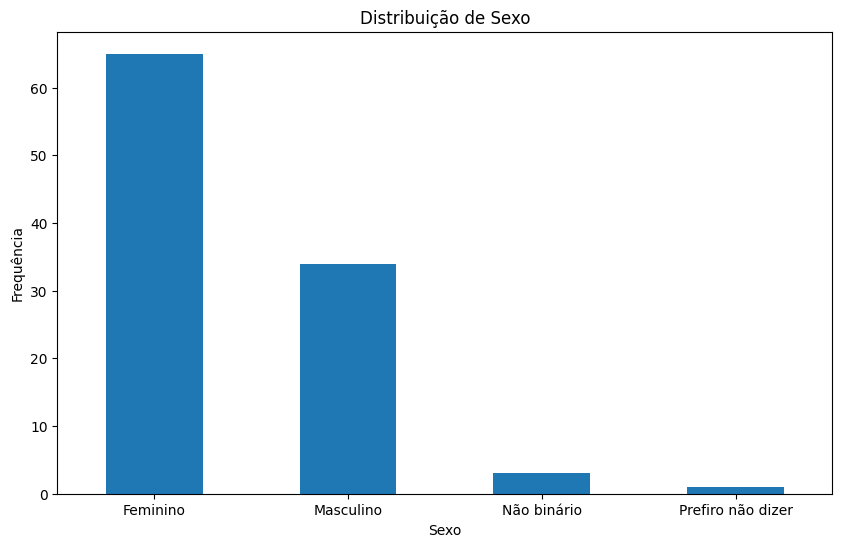

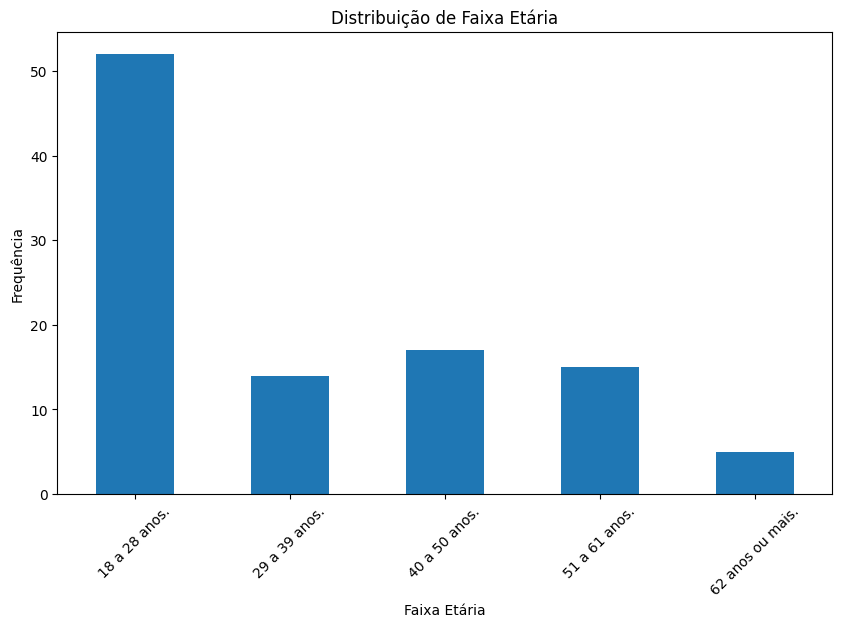

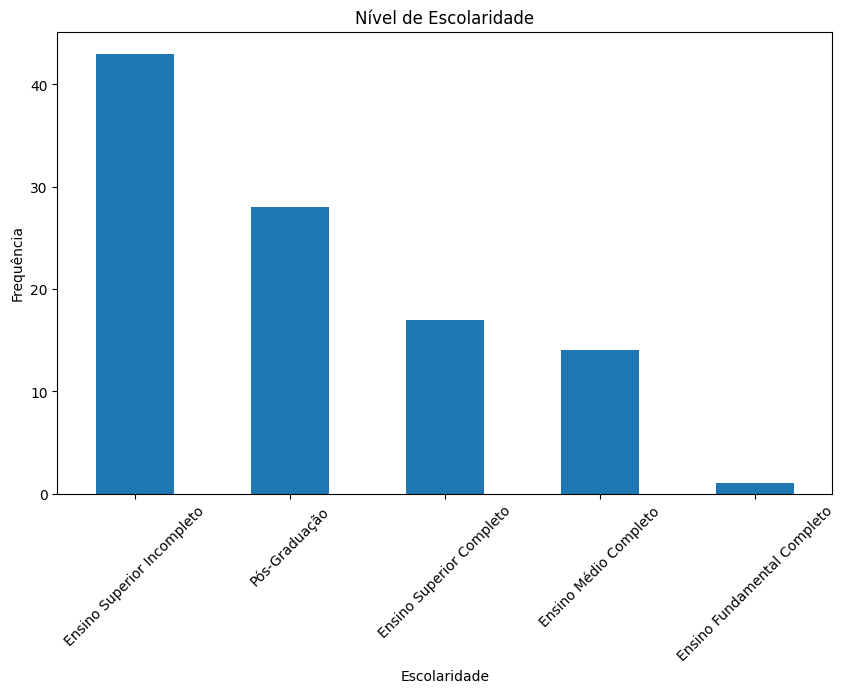

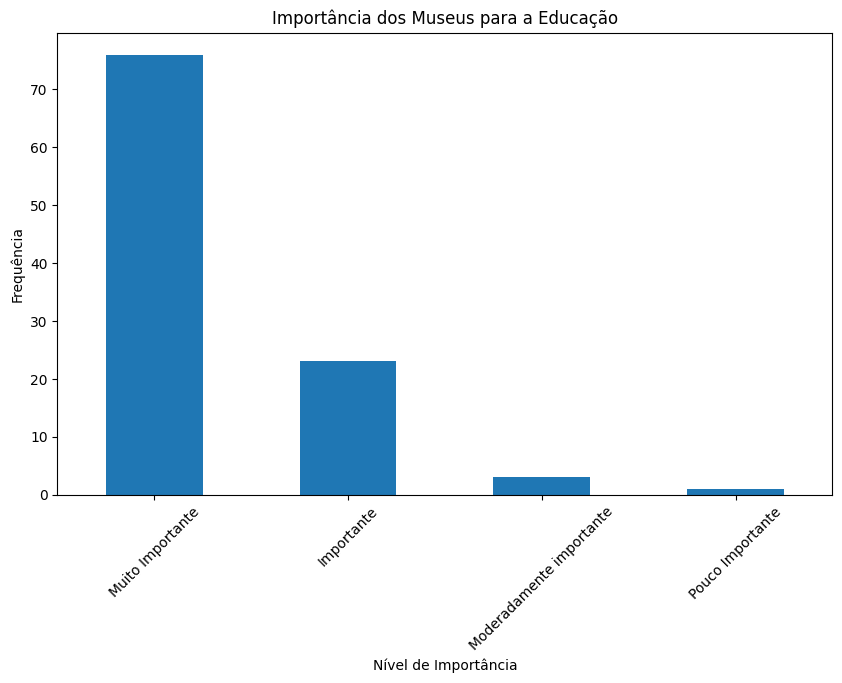

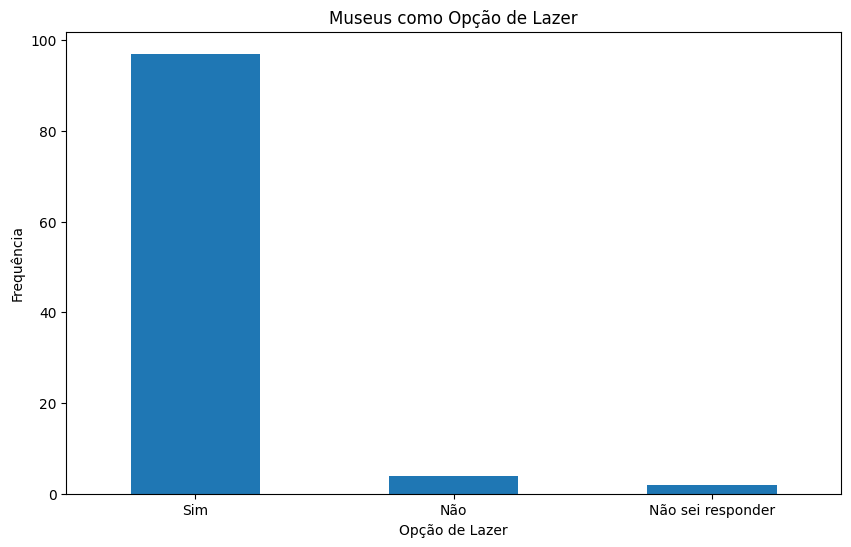

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
file_path = 'museu_cleaned.csv'
data = pd.read_csv(file_path)

# Configurações globais para os gráficos
plt.rcParams['figure.figsize'] = (10, 6)

# Gráfico 1: Distribuição de sexo
data['Qual_é_o_seu_sexo'].value_counts().plot(kind='bar', title='Distribuição de Sexo', xlabel='Sexo', ylabel='Frequência')
plt.xticks(rotation=0)
plt.show()

# Gráfico 2: Distribuição de faixa etária
data['Qual_é_a_sua_idade'].value_counts().sort_index().plot(kind='bar', title='Distribuição de Faixa Etária', xlabel='Faixa Etária', ylabel='Frequência')
plt.xticks(rotation=45)
plt.show()

# Gráfico 3: Nível de escolaridade
data['Qual_é_a_sua_escolaridade'].value_counts().plot(kind='bar', title='Nível de Escolaridade', xlabel='Escolaridade', ylabel='Frequência')
plt.xticks(rotation=45)
plt.show()

# Gráfico 4: Importância dos museus para a educação
data['Para_você_qual_o_nível_de_importância_dos_museus_para_a_educação_na_sociedade'].value_counts().plot(kind='bar', title='Importância dos Museus para a Educação', xlabel='Nível de Importância', ylabel='Frequência')
plt.xticks(rotation=45)
plt.show()

# Gráfico 5: Museus como opção de lazer
data['Você_considera_que_uma_visita_ao_Museu_é_uma_opção_de_lazer_para_passar_tempo_com_a_família_ou_amigos'].value_counts().plot(kind='bar', title='Museus como Opção de Lazer', xlabel='Opção de Lazer', ylabel='Frequência')
plt.xticks(rotation=0)
plt.show()


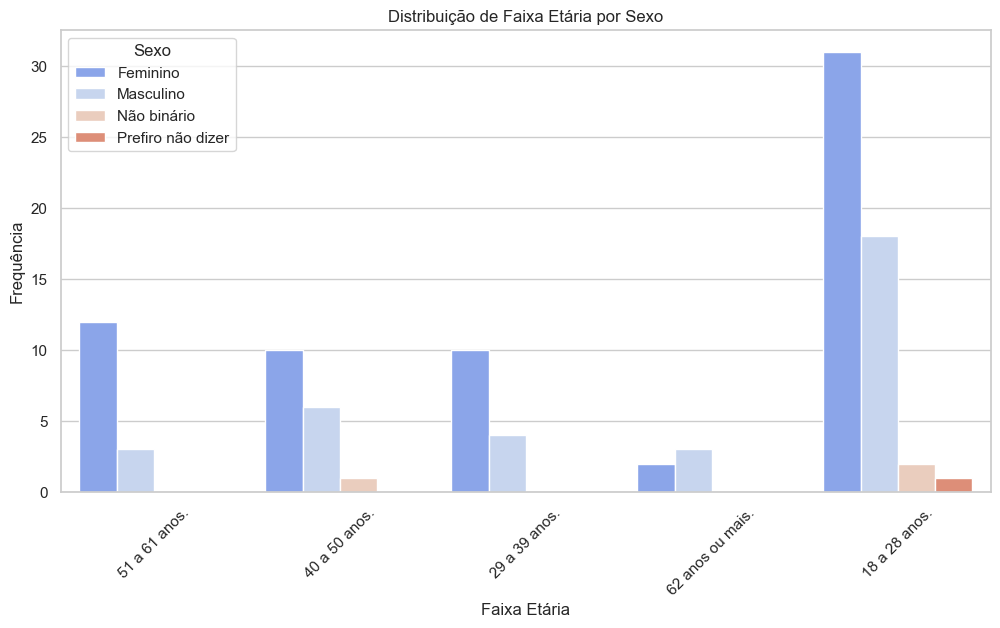

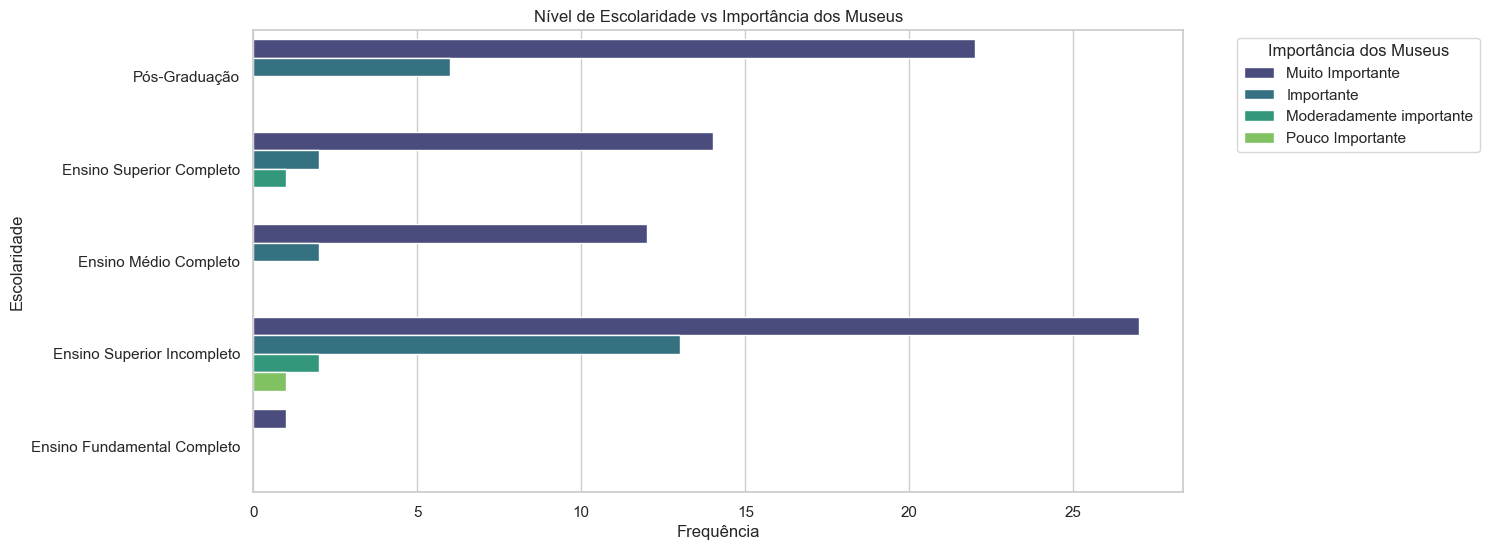

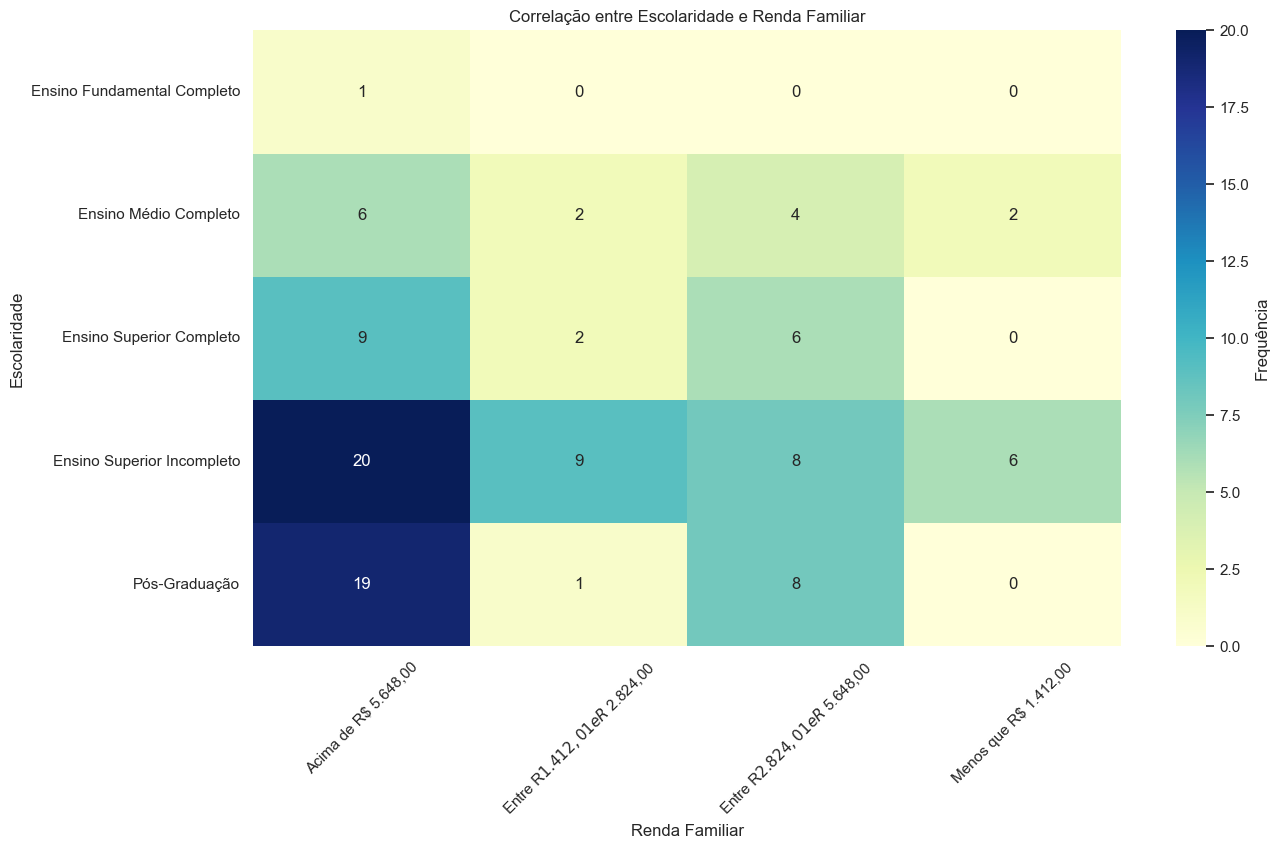

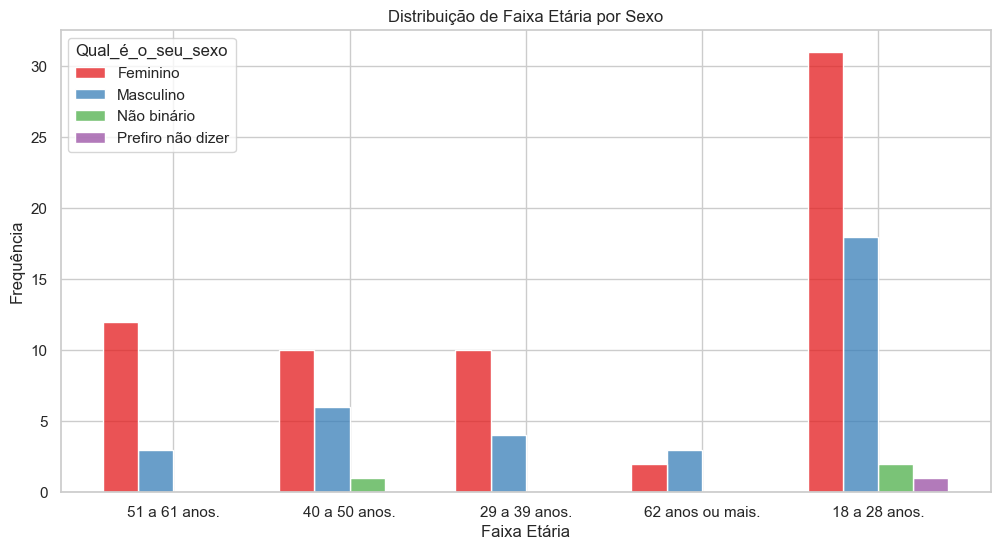

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Carregar o dataset
file_path = 'museu_cleaned.csv'
data = pd.read_csv(file_path)

# Configurações para seaborn
sns.set(style="whitegrid")

# Gráfico 1: Distribuição combinada de sexo e faixa etária
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Qual_é_a_sua_idade', hue='Qual_é_o_seu_sexo', palette='coolwarm')
plt.title('Distribuição de Faixa Etária por Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

# Gráfico 2: Escolaridade vs. Importância dos Museus
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Qual_é_a_sua_escolaridade', hue='Para_você_qual_o_nível_de_importância_dos_museus_para_a_educação_na_sociedade', palette='viridis')
plt.title('Nível de Escolaridade vs Importância dos Museus')
plt.xlabel('Frequência')
plt.ylabel('Escolaridade')
plt.legend(title='Importância dos Museus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 3: Correlação entre escolaridade e renda familiar (Heatmap)
pivot_table = data.pivot_table(index='Qual_é_a_sua_escolaridade', columns='Qual_é_sua_renda_familiar_mensal_A_renda_familiar_é_a_soma_de_todos_os_ganhos_financeiros_dos_membros_de_uma_família_que_moram_no_mesmo_endereço', aggfunc='size', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequência'})
plt.title('Correlação entre Escolaridade e Renda Familiar')
plt.xlabel('Renda Familiar')
plt.ylabel('Escolaridade')
plt.xticks(rotation=45)
plt.show()

# Gráfico 4: Distribuição de Faixa Etária por Sexo
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Qual_é_a_sua_idade', hue='Qual_é_o_seu_sexo', multiple='dodge', shrink=0.8, palette='Set1')
plt.title('Distribuição de Faixa Etária por Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()



C:\Users\guihe\AppData\Local\Temp\ipykernel_17560\13409852.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




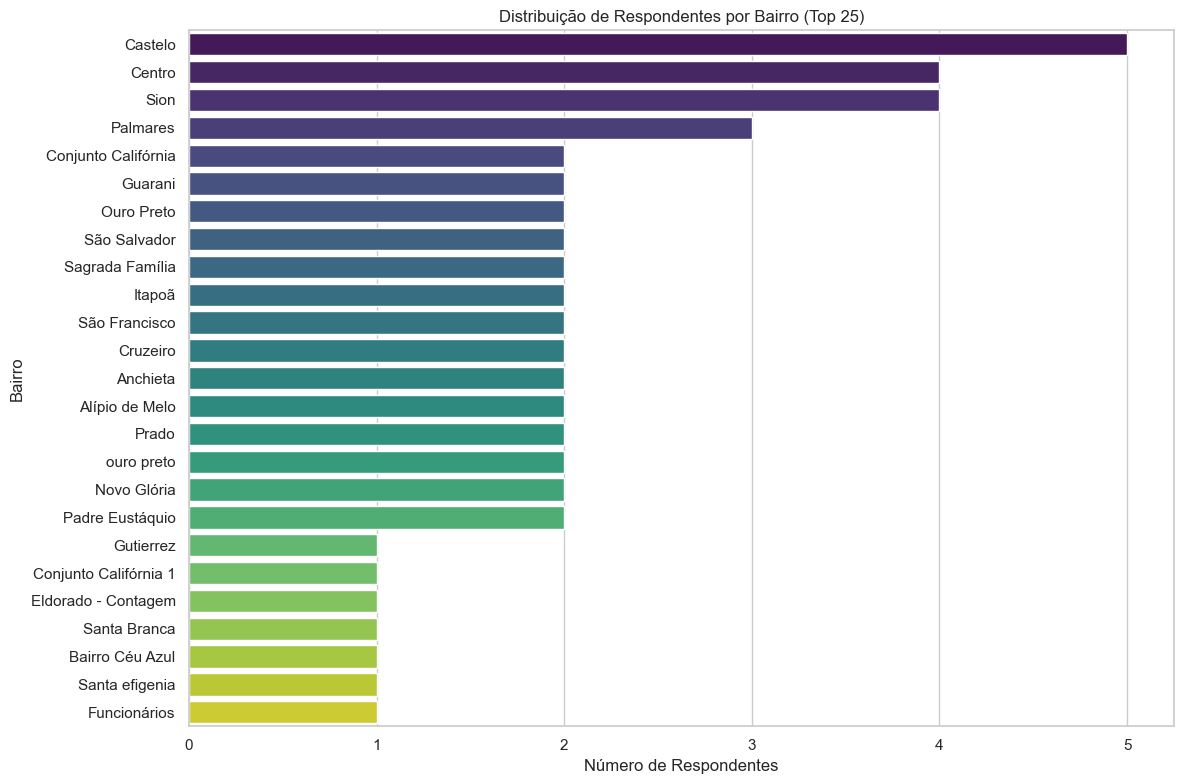

In [18]:
# Gráfico: Distribuição de bairros dos respondentes
plt.figure(figsize=(12, 8))
bairro_counts = data['Em_qual_bairro_você_reside'].value_counts().head(25)  # Considerando os 15 bairros mais mencionados
sns.barplot(x=bairro_counts.values, y=bairro_counts.index, palette='viridis')
plt.title('Distribuição de Respondentes por Bairro (Top 25)')
plt.xlabel('Número de Respondentes')
plt.ylabel('Bairro')
plt.tight_layout()
plt.show()